<a href="https://colab.research.google.com/github/ruinhadan/cifar10/blob/master/CIFAR10_Deep_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: The models aren't being trained. They are merely used to run and understand how they function.


# Deep CNN - VGG16

In [0]:
import torch
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [0]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5 ,0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5 ,0.5), (0.5, 0.5, 0.5))
])

In [0]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform_train)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform_test)

0it [00:00, ?it/s]

170500096it [00:04, 42493161.90it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
num_classes = 10

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

In [0]:
trainiter = iter(trainloader)
images, labels = trainiter.next()
print(images[0])
print(images[0].shape)
print(labels[0].shape)

tensor([[[-0.4118, -0.4118, -0.4118,  ...,  0.1373,  0.1373,  0.1373],
         [-0.4118, -0.4118, -0.4118,  ...,  0.1373,  0.1373,  0.1373],
         [-0.4118, -0.4118, -0.4118,  ...,  0.1373,  0.1373,  0.1373],
         ...,
         [ 0.3255,  0.3255,  0.3255,  ..., -0.2392, -0.2392, -0.2392],
         [ 0.3255,  0.3255,  0.3255,  ..., -0.2392, -0.2392, -0.2392],
         [ 0.3255,  0.3255,  0.3255,  ..., -0.2392, -0.2392, -0.2392]],

        [[-0.2706, -0.2706, -0.2706,  ...,  0.1373,  0.1373,  0.1373],
         [-0.2706, -0.2706, -0.2706,  ...,  0.1373,  0.1373,  0.1373],
         [-0.2706, -0.2706, -0.2706,  ...,  0.1373,  0.1373,  0.1373],
         ...,
         [ 0.2863,  0.2863,  0.2863,  ..., -0.2471, -0.2471, -0.2471],
         [ 0.2863,  0.2863,  0.2863,  ..., -0.2471, -0.2471, -0.2471],
         [ 0.2863,  0.2863,  0.2863,  ..., -0.2471, -0.2471, -0.2471]],

        [[-0.5686, -0.5686, -0.5686,  ..., -0.1059, -0.1059, -0.1059],
         [-0.5686, -0.5686, -0.5686,  ..., -0

In [0]:
from torchvision import models

In [0]:
vgg16 = models.vgg16_bn()

In [0]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
f_in_features = vgg16.classifier[6].in_features
mod_classifier = list(vgg16.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(in_features=f_in_features, out_features=10, bias=True)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [0]:
vgg16.classifier = nn.Sequential(*mod_classifier)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [0]:
print(device)

cuda:0


In [0]:
def evaluate(dataloader, model):
  tot, corr = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    tot += labels.size(0)
    corr += (pred == labels).sum().item()
  return 100*(corr/tot)

In [0]:
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
lossfn = nn.CrossEntropyLoss()
opt = optim.Adam(vgg16.parameters())

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)

In [0]:
loss_arr = []
epochs = 1

for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    outputs = vgg16(inputs)
    loss = lossfn(outputs, labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs

    torch.cuda.empty_cache()

    if i%100 == 0:
      loss_arr.append(loss.item())
      print('Loss = %0.2f, i = %d' % (loss.item(), i))


Loss = 26.75, i = 0


KeyboardInterrupt: ignored

# PRE TRAINED MODEL


In [0]:
vgg16 = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:05<00:00, 108MB/s]


In [0]:
print(vgg16.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


In [0]:
for param in vgg16.parameters():
  param.requires_grad = False

In [0]:
vgg16.classifier[6] = nn.Linear(in_features=vgg16.classifier[6].in_features, out_features=num_classes, bias=True)

In [0]:
for param in vgg16.parameters():
  if param.requires_grad == True:
    print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [0]:
lossfn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg16.parameters(), lr = 0.05)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)

In [0]:
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

i = 0 | Loss = 24.93
i = 100 | Loss = 33.05
i = 200 | Loss = 13.60
i = 300 | Loss = 28.12
i = 400 | Loss = 31.17
i = 500 | Loss = 24.09
i = 600 | Loss = 25.49
i = 700 | Loss = 11.32
i = 800 | Loss = 29.81
i = 900 | Loss = 31.45
i = 1000 | Loss = 10.12
i = 1100 | Loss = 22.54
i = 1200 | Loss = 25.76
i = 1300 | Loss = 8.53
i = 1400 | Loss = 18.51
i = 1500 | Loss = 27.59
i = 1600 | Loss = 24.69
i = 1700 | Loss = 29.52
i = 1800 | Loss = 11.30
i = 1900 | Loss = 18.95
i = 2000 | Loss = 24.69
i = 2100 | Loss = 8.08
i = 2200 | Loss = 26.67
i = 2300 | Loss = 29.92
i = 2400 | Loss = 31.94
i = 2500 | Loss = 13.53
i = 2600 | Loss = 21.16
i = 2700 | Loss = 32.92
i = 2800 | Loss = 17.34
i = 2900 | Loss = 20.59
i = 3000 | Loss = 12.46
i = 3100 | Loss = 24.37
Train acc = 44.59 | Test acc = 44.51


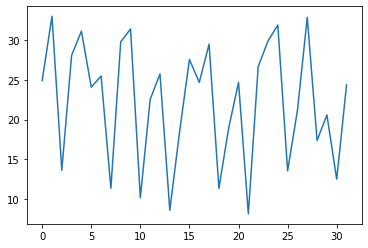

In [0]:
epochs = 1
loss_arr = []

for epoch in range(epochs):

  for i, data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    outputs = vgg16(inputs)
    loss = lossfn(outputs, labels)
    loss.backward()
    opt.step()

    

    if i%100 == 0:
      loss_arr.append(loss.item())
      print('i = %d | Loss = %0.2f' %(i, loss.item()))

    del inputs, outputs, labels
    torch.cuda.empty_cache()

  print('Train acc = %0.2f | Test acc = %0.2f' %(evaluate(trainloader, vgg16), evaluate(testloader, vgg16)))

  plt.plot(loss_arr)
  plt.show()
